<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Calculus_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Partial Derivatives and Integrals**

#**Gradients applied to Machine Learning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

#Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$:

In [ ]:
def f(mx,my):
  return mx**2 - my**2

In order to plot Z with varying x

In [ ]:
xs =  np.linspace(-3,3,1000)

while holding y as contant

In [ ]:
zx = f(xs,0)


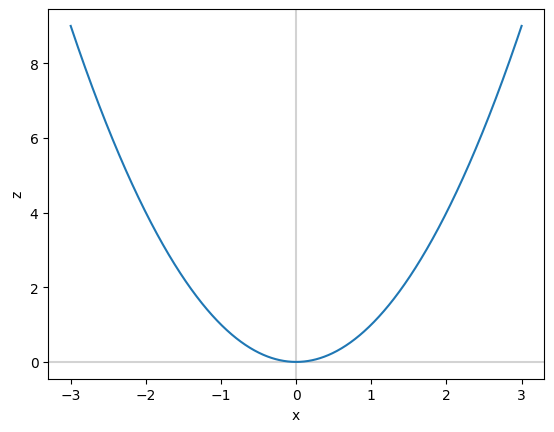

In [ ]:
fig,ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

plt.xlabel('x')
plt.ylabel('z')

_ = ax.plot(xs,zx)

To determine the slope of z wrt x, at a given point, we can use partial derivative. $$ \frac{\partial z}{\partial x} = 2x$$

In [ ]:
def delz_delx(mx,my):
  return 2 *mx

In [ ]:
x_samples = [-2,-1,0,1,2]


In [ ]:
colors = ['red','green','orange','blue','yellow']


In [ ]:
def points_and_tangents_wrt_x(myxs,mx, myy, fz, fprime, col):
  mz = fz(mx,myy)
  plt.scatter(mx,mz,c=col,zorder=3)

  tangent_m = fprime(mx,myy)   #slope is partial derivtive of f(x,y)
  tangent_b = mz - tangent_m*mx   ## Line is z = mx+b, so b = z-mx

  tang_line = tangent_m * myxs + tangent_b

  plt.plot(myxs,tang_line,c=col,linestyle='dashed',linewidth=0.7,zorder=3)

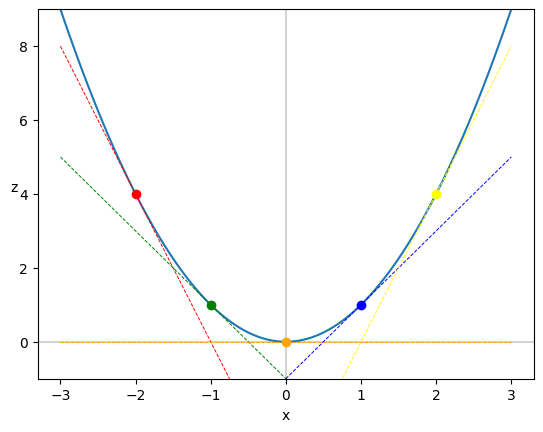

In [ ]:

fig,ax = plt.subplots()

plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

for i,x in enumerate(x_samples):
  points_and_tangents_wrt_x(xs,x,0,f,delz_delx,colors[i])

plt.ylim(-1,9)
plt.xlabel('x')
plt.ylabel('z',rotation=0)

_ = ax.plot(xs,zx)

##This graph shows that the slope of z is twice as x

##Now lets plot z wrt y

In [ ]:
ys = np.linspace(-3,3,1000)

In [ ]:
y_samples= [-2,-1,0,1,2]

In [ ]:
def f(myx,myy):
  return myx**2 - myy**2

In [ ]:
def delz_dely(mx,my):
  return -2 *my


In [ ]:
zy = f(2,ys)

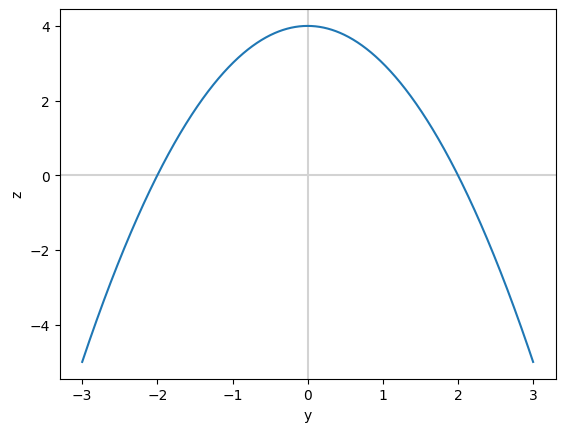

In [ ]:
fig,ax = plt.subplots()

plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

plt.xlabel('y')
plt.ylabel('z')

_ = ax.plot(ys,zy)

In [ ]:
def points_tang_wrt_y(my_ys,mx,my,f,fprime,col):
  mz = f(mx,my)
  plt.scatter(my,mz,c=col,zorder=3)

  tangent_m = fprime(mx,my)
  tangent_b = mz - tangent_m*my
  tang_line = tangent_m * my_ys + tangent_b

  plt.plot(my_ys,tang_line,c=col,linestyle='dashed',linewidth=0.7,zorder=3)

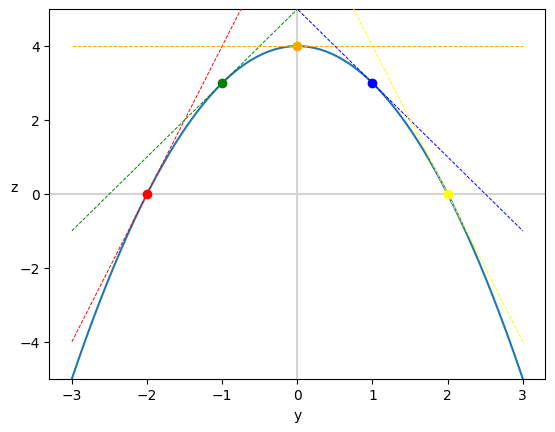

In [ ]:
fig,ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')

for i,y in enumerate(y_samples):
  points_tang_wrt_y(ys,2,y,f,delz_dely,colors[i])

plt.ylim(-5,5)
plt.xlabel('y')
plt.ylabel('z',rotation=0)
_ = ax.plot(ys,zy)

##Using autodiff for calculating partial derivatives

In [ ]:
x = torch.tensor(4.).requires_grad_()
x

tensor(4., requires_grad=True)

In [ ]:
y = torch.tensor(6.).requires_grad_()
y

tensor(6., requires_grad=True)

In [ ]:
z = f(x,y)
z

tensor(-20., grad_fn=<SubBackward0>)

In [ ]:
z.backward()   ##autodiff

In [ ]:
x.grad

tensor(8.)

In [ ]:
y.grad

tensor(-12.)

In [ ]:
(f(4.0,6.000001) - f(4,6))/0.000001

-12.00000099998988

#**Partial Derivatives of a Cylinder's VOlume**

In [ ]:
def vol(r,l):
  return math.pi * r**2 * l

In [ ]:
#lets say radius is 3
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [ ]:
## lets say length l is 5 m
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [ ]:
v = vol(r,l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [ ]:
v.backward()  #calculating partial derivatives with autodiff

$$\frac{\partial v}{\partial l} = \pi r^2$$

In [ ]:
l.grad  ##this is actually partial derivative of l wrt v.

tensor(28.2743)

In [ ]:
math.pi * r**2

tensor(28.2743, grad_fn=<MulBackward0>)

In [ ]:
r.grad

tensor(94.2478)

In [ ]:
2 * math.pi *l*r

tensor(94.2478, grad_fn=<MulBackward0>)

## This measn that a change in l by one unit, with r=3, a change is occured in v by 28.27
lets prove

In [ ]:
vol(3,6)

169.64600329384882

In [ ]:
vol(3,6) - vol(3,5)

28.274333882308127

##Change in r

$r$ is included in the partial derivative so adjusting it affects the scale of

---

its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [ ]:
r.grad

tensor(94.2478)

In [ ]:
vol(3,4)-vol(2,4)

62.83185307179586

In [ ]:
vol(3,4)-vol(2.999999,4)

7.539821112345635e-05

In [ ]:
delta = 1e-6

In [ ]:
(vol(3+delta,5) -vol(3,5))/delta   ###dividing by delta restores the scale

94.24779531741478

#**Integrals**

In [1]:
from scipy.integrate import quad  ## 'quadrature' = numerical integration (as opposed to symbolic)


## From the slides: $$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [2]:
def g(x):
  return x/2

In [3]:
quad(g,1,2)

(0.75, 8.326672684688674e-15)

### The second output of quad is an estimate of teh absolute error of the integrals, which in this case is essentially zero

In [4]:
## exercise

def c(x):
  return 2*x

In [5]:
quad(c,3,4)

(7.0, 7.771561172376096e-14)